/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


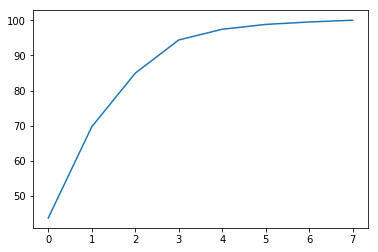

,vh_age,vh_sale_end,vh_sale_begin,vh_speed,vh_din
0,11,10,12,179,101
1,7,8,10,174,86
2,18,17,19,155,125
3,11,8,12,214,250
4,9,5,10,157,68
5,13,11,15,155,75
6,12,11,13,150,75
7,8,6,10,195,136
8,7,8,10,167,75
9,15,12,17,191,109


In [80]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import numpy as np

df = pd.read_csv('part2_data.csv')

# Drop claim amount, useless
df.drop('claim_amount', inplace=True, axis=1)
# Features vs labels
features = df[df.columns[:-2]]
labels = df[df.columns[-1]]
# Scale features appropriately
scaler = preprocessing.StandardScaler()
features_standardized = scaler.fit_transform(features)
# Run PCA to remove unnecessary features
pca = PCA(n_components=len(features.columns))
pca.fit(features_standardized)
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(range(0,len(features.columns)), var)
plt.show()
# PCA shows we could remove features, 4 features explain most of the data
def remove_corr_features(df, features, max_features):
    """Remove correlated features"""
    reduced_df = df.copy()
    d = len(features.columns)
    cols_to_keep = df.corr().iloc[-1].abs().sort_values(ascending=False)[1:max_features+1].index
    reduced_df = df[cols_to_keep]
    return reduced_df
reduced_df = remove_corr_features(df, features, 5)

# Split into train and tests
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.25, random_state=42)
# Reshape so all variables have same shape
y_train = y_train.reshape(-1,1)
y_test = y_train.reshape(-1,1)

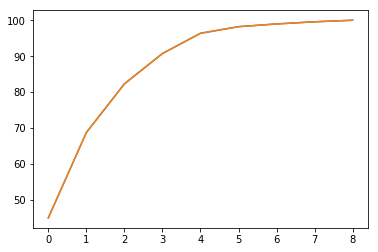

In [34]:
import numpy as np
y = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

# r_2 = []
# for i in range(9):
#     pca = PCA(n_components=9)
#     pca.fit(features_standardized)
#     pca.explained_variance_ratio_
plt.plot(range(0,9), y)
plt.show()

In [19]:

# pd.DataFrame(features_standardized).describe()
# features_standardized[:,4].std()
pd.DataFrame(features_standardized).describe()

,0,1,2,3,4,5,6,7,8
count,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04
mean,1.353584e-16,-5.542233e-17,-2.497558e-16,-3.552714e-17,2.568612e-16,9.343637e-17,1.065814e-18,6.465939e-17,4.588330e-16
std,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00
min,-2.409057e+00,-1.222084e+00,-3.566457e+00,-2.240560e+00,-2.999452e-01,-1.376132e+00,-1.722446e+00,-2.021429e+00,-6.256584e+00
25%,-7.868125e-01,-7.940888e-01,-6.247261e-01,-6.891799e-01,-2.999452e-01,-7.307820e-01,-6.832316e-01,-7.121882e-01,-5.926434e-01
50%,-4.328352e-02,-2.234280e-01,-1.337165e-01,-7.448232e-02,-2.999452e-01,-2.145016e-01,-2.378539e-01,-2.082777e-01,-3.483109e-02
75%,7.002454e-01,4.898981e-01,5.649447e-01,5.109440e-01,-2.999452e-01,4.308489e-01,5.044421e-01,4.736813e-01,6.087985e-01
max,3.268800e+00,7.908489e+00,1.105784e+01,1.224874e+01,1.745384e+01,7.658774e+00,6.888188e+00,1.591663e+01,4.899662e+00


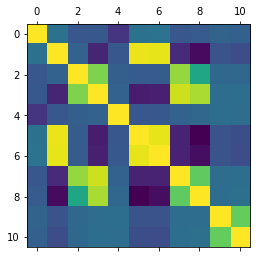

In [27]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())
plt.show()


In [28]:
df.corr()

,drv_age1,vh_age,vh_cyl,vh_din,pol_bonus,vh_sale_begin,vh_sale_end,vh_value,vh_speed,claim_amount,made_claim
drv_age1,1.000000,0.086272,-0.070154,-0.060886,-0.239127,0.087647,0.091855,-0.070479,-0.047231,-0.001115,-0.019774
vh_age,0.086272,1.000000,-0.008131,-0.317329,-0.068113,0.959647,0.946627,-0.289083,-0.423225,-0.095094,-0.119963
vh_cyl,-0.070154,-0.008131,1.000000,0.715033,-0.022742,-0.041891,-0.041561,0.770523,0.402453,0.021822,0.027005
vh_din,-0.060886,-0.317329,0.715033,1.000000,-0.006875,-0.356119,-0.339792,0.885362,0.814446,0.058456,0.065321
pol_bonus,-0.239127,-0.068113,-0.022742,-0.006875,1.000000,-0.069427,-0.066032,-0.008391,0.018576,0.061247,0.055965
vh_sale_begin,0.087647,0.959647,-0.041891,-0.356119,-0.069427,1.000000,0.946226,-0.319726,-0.467788,-0.092680,-0.117379
vh_sale_end,0.091855,0.946627,-0.041561,-0.339792,-0.066032,0.946226,1.000000,-0.324828,-0.412546,-0.092268,-0.118066
vh_value,-0.070479,-0.289083,0.770523,0.885362,-0.008391,-0.319726,-0.324828,1.000000,0.642438,0.059486,0.063858
vh_speed,-0.047231,-0.423225,0.402453,0.814446,0.018576,-0.467788,-0.412546,0.642438,1.000000,0.055108,0.071506
claim_amount,-0.001115,-0.095094,0.021822,0.058456,0.061247,-0.092680,-0.092268,0.059486,0.055108,1.000000,0.653965


In [75]:
y_train.values.reshape(-1,1)

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])